In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
saws = pd.read_csv('med_center_saws.csv').set_index('Record #')
saws.head(1)

,Unnamed: 0,Prefix,Service Location,Suffix,ZIP Code,17-JAN,17-FEB,17-MAR,17-APR,17-MAY,...,20-MAR,20-APR,20-MAY,20-JUN,20-JUL,20-AUG,20-SEP,20-OCT,20-NOV,20-DEC
Record #,,,,,,,,,,,,,,,,,,,,,
274262,671,NaN,ACCOLON,DR,78229,6733,6733,6733,7481,6733,...,3740,5237,5985,5237,4489,13466,5985,5237,5237,5237


In [3]:
air = pd.read_csv('med_center_air.csv')
air.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,8,7,8,0,0,0,0,None,Normal


In [4]:
flood = pd.read_csv('med_center_flood.csv')
flood.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m,AlertTriggered,SensorStatus
0,2021-05-15T00:11:55,400789,ATT,ranger sensor,29.511164,-98.586094,Medical Center,-999,-999,13.090551,3.99,13.500656,4.115,N,Normal


In [5]:
sound = pd.read_csv('med_center_sound.csv')
sound.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,NoiseLevel_db,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,60,None,Normal


In [6]:
weather = pd.read_csv('med_center_weather.csv')
weather.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,21,71,88,18.934569,66.082224,979,NaN,Normal


___
## SAWS Data Summary

In [7]:
saws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 274262 to 545921
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3037 non-null   int64 
 1   Prefix            185 non-null    object
 2   Service Location  3037 non-null   object
 3   Suffix            1365 non-null   object
 4   ZIP Code          3037 non-null   int64 
 5   17-JAN            1873 non-null   object
 6   17-FEB            1861 non-null   object
 7   17-MAR            1870 non-null   object
 8   17-APR            1868 non-null   object
 9   17-MAY            1870 non-null   object
 10  17-JUN            1862 non-null   object
 11  17-JUL            1868 non-null   object
 12  17-AUG            1871 non-null   object
 13  17-SEP            1870 non-null   object
 14  17-OCT            1866 non-null   object
 15  17-NOV            1872 non-null   object
 16  17-DEC            1870 non-null   object
 17  18-JAN 

In [8]:
saws.describe()

,Unnamed: 0,ZIP Code
count,3037.000000,3037.0
mean,111709.641422,78229.0
std,75363.806328,0.0
min,671.000000,78229.0
25%,50922.000000,78229.0
50%,117231.000000,78229.0
75%,166503.000000,78229.0
max,272330.000000,78229.0


In [9]:
saws.isnull().sum()

Unnamed: 0             0
Prefix              2852
Service Location       0
Suffix              1672
ZIP Code               0
17-JAN              1164
17-FEB              1176
17-MAR              1167
17-APR              1169
17-MAY              1167
17-JUN              1175
17-JUL              1169
17-AUG              1166
17-SEP              1167
17-OCT              1171
17-NOV              1165
17-DEC              1167
18-JAN              1169
18-FEB              1171
18-MAR              1165
18-APR              1166
18-MAY              1168
18-JUN              1162
18-JUL              1174
18-AUG              1177
18-SEP              1165
18-OCT              1172
18-NOV              1168
18-DEC              1167
19-JAN              1171
19-FEB              1169
19-MAR              1167
19-APR              1166
19-MAY              1165
19-JUN              1163
19-JUL              1164
19-AUG              1171
19-SEP              1165
19-OCT              1162
19-NOV              1167


### Takeaways:
- How should we handle these nulls?

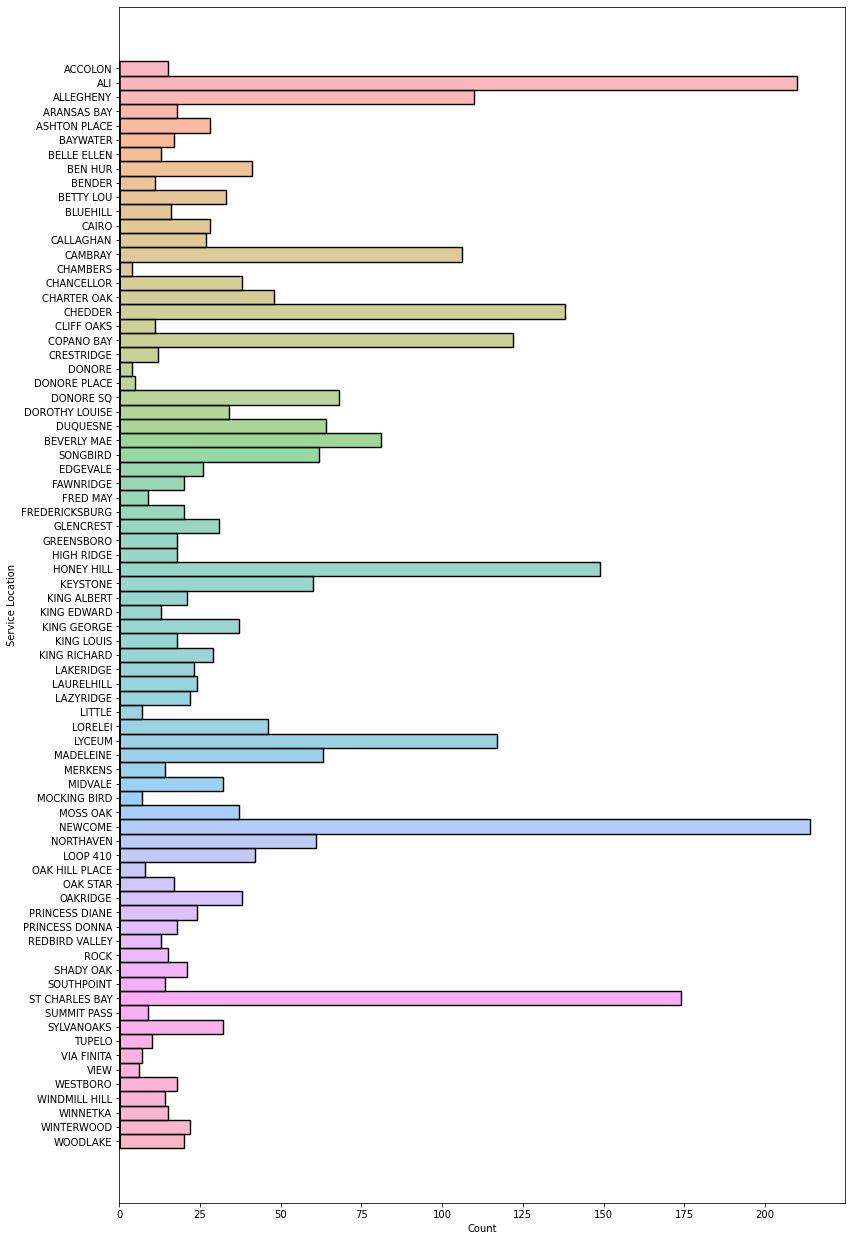

In [10]:
plt.figure(figsize=(13,22))
sns.histplot(y=saws['Service Location'], hue=saws['Service Location'])
plt.legend([],[], frameon=False)
plt.show()

In [11]:
saws['ZIP Code'].value_counts()

78229    3037
Name: ZIP Code, dtype: int64

___

### SAWS Cleaning
- Should do somehting about the values that are just an asterisk
    - All of the date com
        - Replace with 0
            - Reason because * stands for water is not being provided to that resident during that time.
- Change columns of dates into rows of dates
    - Flip it
        - 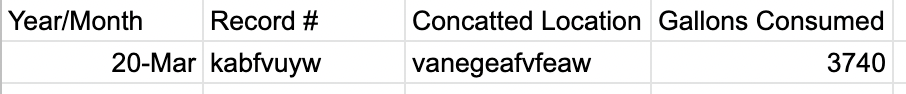
- Drop
    - Unnamed: 0
    - ZIP Code
- Handle Nulls
    - Replace with 0
        - Reason for this is because we are assuming that the house
            - wasnt built yet, 
            - not rented out yet
            - water shut off
            - ect.
- Concat Prefix and Suffix onto Service Location
    - Then drop Preffix, Suffix, and Service Location
            


In [12]:
saws.head(10)

,Unnamed: 0,Prefix,Service Location,Suffix,ZIP Code,17-JAN,17-FEB,17-MAR,17-APR,17-MAY,...,20-MAR,20-APR,20-MAY,20-JUN,20-JUL,20-AUG,20-SEP,20-OCT,20-NOV,20-DEC
Record #,,,,,,,,,,,,,,,,,,,,,
274262,671,NaN,ACCOLON,DR,78229,6733,6733,6733,7481,6733,...,3740,5237,5985,5237,4489,13466,5985,5237,5237,5237
274263,672,NaN,ACCOLON,DR,78229,5237,5237,5985,5985,5985,...,3740,4489,3740,5237,3740,4489,11222,7481,4489,8229
274264,673,NaN,ACCOLON,DR,78229,2992,2992,2244,3740,2992,...,3740,2992,2992,2992,2244,2992,1496,*,NaN,NaN
274265,674,NaN,ACCOLON,DR,78229,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274266,675,NaN,ACCOLON,DR,78229,4489,4489,3740,4489,4489,...,4489,4489,8229,8977,5237,8229,8977,8977,8229,5237
274267,676,NaN,ACCOLON,DR,78229,0,748,748,748,748,...,748,748,748,0,748,748,748,748,1496,1496
274268,677,NaN,ACCOLON,DR,78229,748,1496,3740,2244,1496,...,748,748,1496,748,0,2244,748,1496,1496,748
274269,678,NaN,ACCOLON,DR,78229,2992,3740,2244,2992,2992,...,3740,2992,3740,3740,2244,3740,3740,3740,2992,4489
274270,679,NaN,ACCOLON,DR,78229,748,748,748,748,1496,...,748,748,1496,748,1496,1496,1496,1496,1496,748


### Cosa Cleaning
- Drop
    - LAT
    - LONG
    - Zone
    - Sensor ID
    - Sensor Model
    - Sensor Status
- Make new features
    - Daily Total
    - Mothly Total
    - Daily Average
    - Monthly Average
- Specific to data sets
    - Air quality
        - is there a way for us to make a feature for how good or bad the air is?
        - Handle nulls
            - AlertTriggered
                - Replace with None
                    - Because majority of these values are NONE
                        - So it is safe to assume that they would also be None
    - Flood
        - Drop 
            - Alert Triggered
                - Because they are all the same
    - Sound
        - Drop
            - AlertTriggered
                - They are all none
    - Weather
        - Drop
            - AlertTriggered
                - They are all Null values

In [13]:
air.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,8,7,8,0,0,0,0,None,Normal


In [14]:
air.isnull().sum()

DateTime             0
Sensor_id            0
Vendor               0
SensorModel          0
LAT                  0
LONG                 0
Zone                 0
Pm1_0                0
Pm2_5                0
Pm10                 0
SO2                  0
O3                   0
CO                   0
NO2                  0
AlertTriggered    5760
SensorStatus         0
dtype: int64

In [15]:
air.AlertTriggered.value_counts()

None     10816
no2       6464
pm2_5      292
co          24
so2         13
o3           7
pm10         3
Name: AlertTriggered, dtype: int64

In [16]:
flood.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m,AlertTriggered,SensorStatus
0,2021-05-15T00:11:55,400789,ATT,ranger sensor,29.511164,-98.586094,Medical Center,-999,-999,13.090551,3.99,13.500656,4.115,N,Normal


In [17]:
flood.AlertTriggered.value_counts()

N    2872
Name: AlertTriggered, dtype: int64

In [18]:
weather.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,21,71,88,18.934569,66.082224,979,NaN,Normal


In [19]:
weather.isnull().sum()

DateTime              0
Sensor_id             0
Vendor                0
SensorModel           0
LAT                   0
LONG                  0
Zone                  0
Temp_C                0
Temp_F                0
Humidity              0
DewPoint_C            0
DewPoint_F            0
Pressure_Pa           0
AlertTriggered    16179
SensorStatus          0
dtype: int64

In [20]:
weather.shape

(16179, 15)

In [21]:
weather.AlertTriggered.value_counts()

Series([], Name: AlertTriggered, dtype: int64)

In [22]:
sound.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,NoiseLevel_db,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,60,None,Normal


In [23]:
sound.isnull().sum()

DateTime             0
Sensor_id            0
Vendor               0
SensorModel          0
LAT                  0
LONG                 0
Zone                 0
NoiseLevel_db        0
AlertTriggered    5760
SensorStatus         0
dtype: int64

In [24]:
sound.AlertTriggered.value_counts()

None    17619
Name: AlertTriggered, dtype: int64

___

# Prepare Air quality
- Drop
    - LAT
    - LONG
    - Zone
    - Sensor ID
    - Sensor Model
    - Sensor Status
- Make new features
    - Daily Total
    - Mothly Total
    - Daily Average
    - Monthly Average
        - **Waiting for now**
            - Reason for this is because we would be adding in 28 new features.
                - We plan to see if it would be helpful to do it during exploration
- is there a way for us to make a feature for how good or bad the air is?
- Handle nulls
    - AlertTriggered
        - Replace with None
            - Because majority of these values are NONE
                - So it is safe to assume that they would also be None

In [25]:
air = pd.read_csv('med_center_air.csv')
air.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,8,7,8,0,0,0,0,None,Normal


In [26]:
def clean_air(df):
    '''Drops unneeded columns from the air quality df
    then handles the nulls in alert triggered column'''
    # drop the colums
    df = df.drop(columns=['LAT', 'LONG', 'Zone', 
                      'Sensor_id', 'SensorModel', 
                      'SensorStatus'])
    df.fillna("None", inplace = True)
    # return new df
    return df

In [27]:
air = clean_air(air)
air.head(1)

,DateTime,Vendor,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered
0,2021-05-16T00:01:26,ATT,8,7,8,0,0,0,0,None


In [28]:
air.isnull().sum()

DateTime          0
Vendor            0
Pm1_0             0
Pm2_5             0
Pm10              0
SO2               0
O3                0
CO                0
NO2               0
AlertTriggered    0
dtype: int64